#Insurance


##First Look

**Insurance**: an agreement in which you pay a company money and they pay your costs if you have an accident, injury, etc.(Cambridge Dictionary)
* This dataset got 1338 row and 7 columns.
* Columns:
  * **age**
  * **sex**
  * **bmi**
  * **children**
  * **smoker**
  * **region**
  * **charges**
* Our target variable is "charges"
* Basically, we want to use this dataset without "charges" columns to "fit" our machine learning model. Then we will use this model for predict charges.

##Import The Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance = pd.read_csv("insurance.csv")
df = insurance.copy() #with copy(), we work with a copy and keep the original
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Explore The Data

In [3]:
df.shape

(1338, 7)

In [4]:
df.info() #we got 3 object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum() #Check for empty values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
"NaN" in df #Check for "NaN" values

False

In [7]:
df.describe().T #Look the data statistical, for better understand we need visualization but for now, children and charges values much more close to min values

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
df.groupby("sex").count() #female and male counts are close each other

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [9]:
df.groupby("smoker").count() #Non smoker much more than smoker

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [10]:
df.groupby("region").count() #Values close to each other

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [11]:
age_adjusted = pd.cut(df["age"], [18,39,64]) #for better use "age", we need grouping like [18,39] and [39,64]
bmi_adjusted = pd.cut(df["bmi"], [15,30,53])

In [12]:
df.groupby(age_adjusted)["charges"].mean() #[39,64] group "charges" more than [18,39] group

age
(18, 39]    10507.463864
(39, 64]    16430.512562
Name: charges, dtype: float64

In [13]:
df.groupby(bmi_adjusted)["charges"].mean() #[15,30] group "charges" more than [30,53] group

bmi
(15, 30]    10719.386942
(30, 53]    15581.377264
Name: charges, dtype: float64

In [14]:
df.groupby("sex")["charges"].mean() #Close to each other

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [15]:
df.groupby("children")["charges"].mean() #Something weird about 4 and 5 children "charges" is lower

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [16]:
df.groupby("smoker")["charges"].mean() #Smoker charges much much more than non smoker, obviously

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [17]:
df.groupby("region")["charges"].mean() #Close to each other

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [18]:
df.pivot_table("charges", index=age_adjusted, columns=bmi_adjusted) #With pivot_table(), we can check a variable (charges) with two or more other variables (age,bmi)

bmi,"(15, 30]","(30, 53]"
age,,
"(18, 39]",7958.834898,13369.082353
"(39, 64]",14278.902258,18058.450518


In [19]:
df.pivot_table("charges", index="children", columns="smoker")

smoker,no,yes
children,,
0,7611.793335,31341.363954
1,8303.109350,31822.654334
2,9493.093674,33844.235755
3,9614.519391,32724.915268
4,12121.344408,26532.276933
5,8183.845556,19023.260000


##Visualization

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

* In the "Explore The Data" section, we saw that "age", "bmi", "children" and "smoker" variables were associated with "charges" variable. But we need visualization to better understand.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


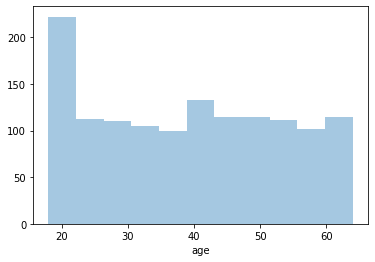

In [21]:
sns.distplot(df.age, kde=False); #Mostly young people

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


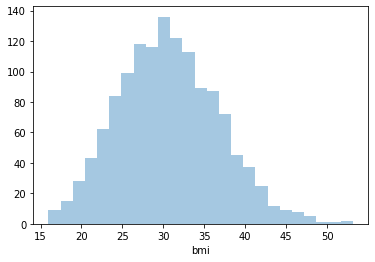

In [22]:
sns.distplot(df.bmi, kde=False); #Looking normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


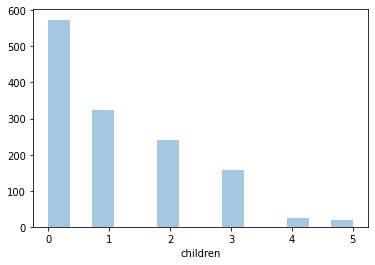

In [23]:
sns.distplot(df.children, kde=False); #Mostly 0 children, 4 and 5 children very low

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


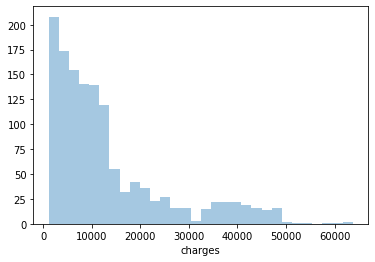

In [24]:
sns.distplot(df.charges, kde=False); #Most "charges" very low

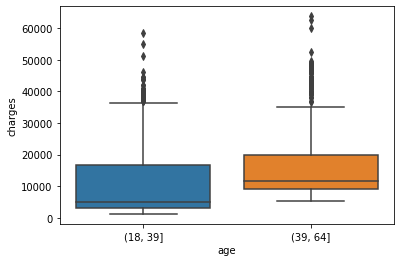

In [25]:
sns.boxplot(x=age_adjusted, y="charges", data=df);

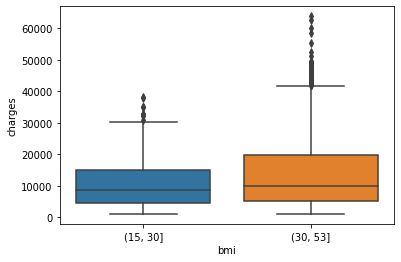

In [26]:
sns.boxplot(x=bmi_adjusted, y="charges", data=df);

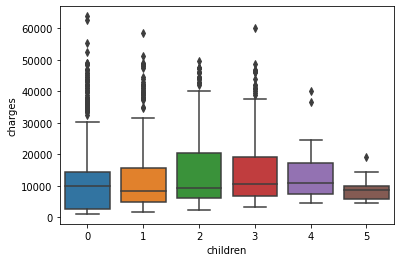

In [27]:
sns.boxplot(x="children", y="charges", data=df);

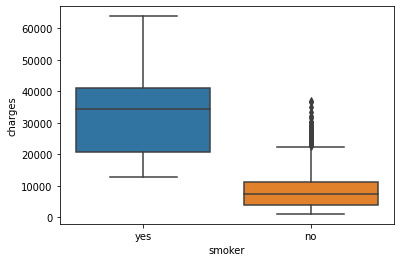

In [28]:
sns.boxplot(x="smoker", y="charges", data=df);

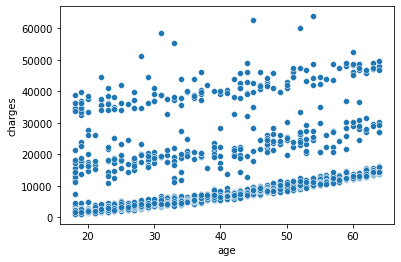

In [29]:
sns.scatterplot(x="age", y="charges", data=df); #there is a correlation between age and charges

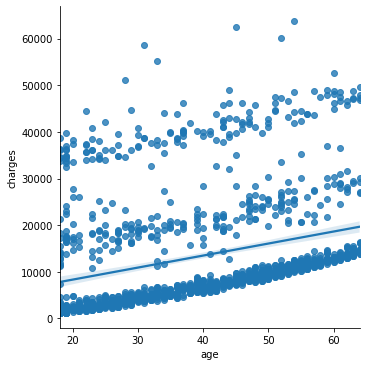

In [30]:
sns.lmplot(x="age", y="charges", data=df);

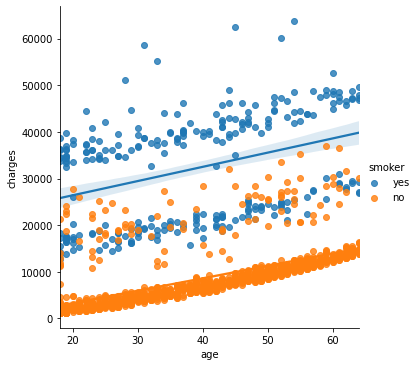

In [31]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df);

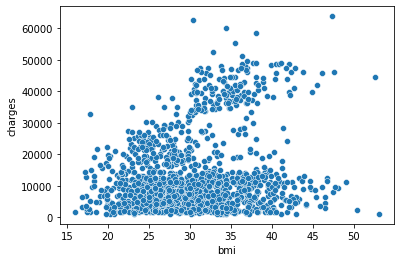

In [32]:
sns.scatterplot(x="bmi", y="charges", data=df);

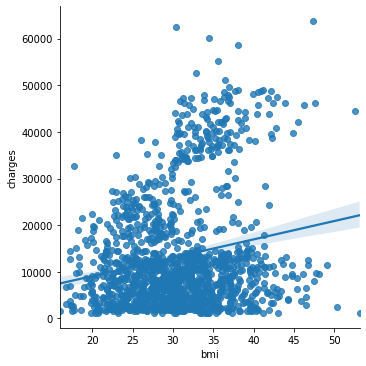

In [33]:
sns.lmplot(x="bmi", y="charges", data=df);

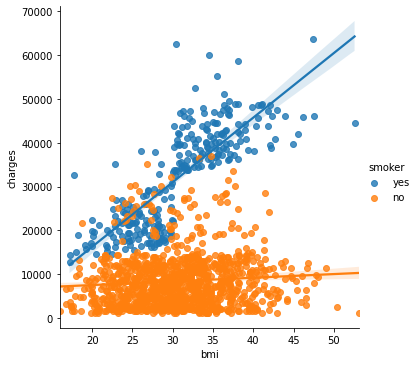

In [34]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df);

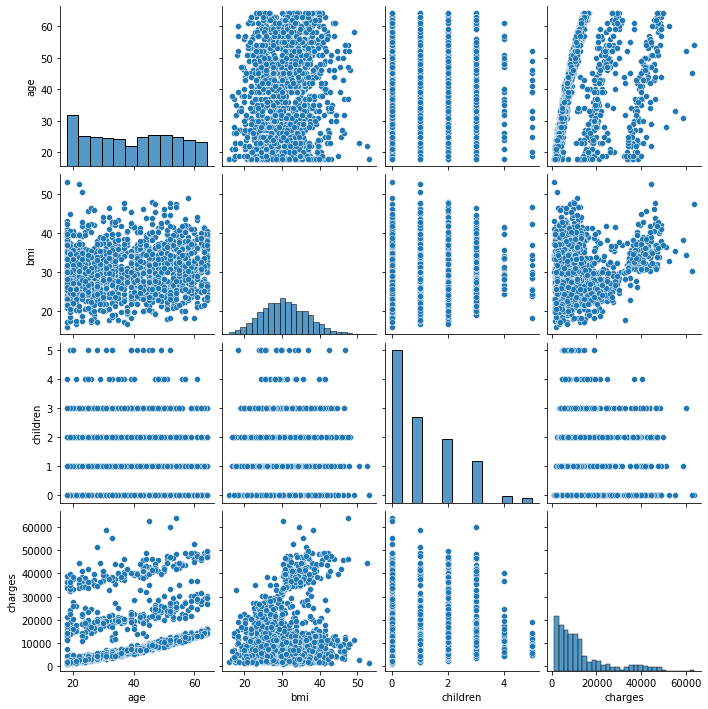

In [35]:
sns.pairplot(df);

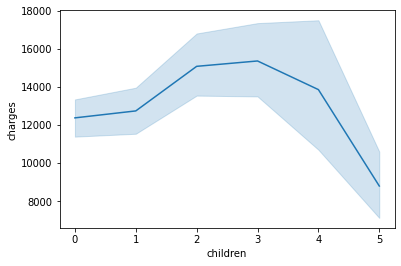

In [36]:
sns.lineplot(x="children", y="charges", data=df);

##Preprocess

In [37]:
df.head() #We need to convert this object variables to numeric variables for better modeling

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df = pd.get_dummies(df) #We convert it to binary
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [39]:
df = df.drop(["sex_male", "smoker_yes", "region_northeast"], axis=1) #We dont need this columns because if a column equals 0, then other must be 1 like "smoker" variable. If "smoker_yes" variable equals 0, then "smoker_no" must be 1.
df.head()

,age,bmi,children,charges,sex_female,smoker_no,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0


In [40]:
df.shape

(1338, 9)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   uint8  
 5   smoker_no         1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 48.5 KB


##Model

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [43]:
X = df.drop(["charges"], axis=1) #We drop "charges" variable and others will be X
y = df["charges"] #We select "charges" to our target variables as y

In [44]:
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [45]:
print(df.size)
print(X.size)
print(y.size)

12042
10704
1338


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #We split our data, train and test. We use train data for "fit" the model and get score with test data. 

In [47]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

8560
2144
1070
268


In [48]:
def autoML(algorithm): 
  #With this function, we apply this methods to some algorithms. Then we select the best one of them

  model = algorithm().fit(X_train, y_train)
  y_pred = model.predict(X_test)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  Score = model.score(X_test, y_test)
  model_name = algorithm.__name__
  
  print(model_name, "RMSE: ", RMSE, "Score: ", Score)

In [49]:
algorithms = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor]

In [50]:
for i in algorithms:
  print(autoML(i))

LinearRegression RMSE:  5796.284659276273 Score:  0.7835929767120724
None
Ridge RMSE:  5800.434215796178 Score:  0.7832830144988215
None
Lasso RMSE:  5797.025750669779 Score:  0.7835376351805539
None
DecisionTreeRegressor RMSE:  6264.10774054771 Score:  0.7472504579706084
None
RandomForestRegressor RMSE:  4633.944294797479 Score:  0.8616836381144668
None
GradientBoostingRegressor RMSE:  4334.498458936713 Score:  0.8789820908036193
None
[10:02:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor RMSE:  4324.3638868318985 Score:  0.8795473377073822
None
LGBMRegressor RMSE:  4534.0250398531325 Score:  0.867584212350846
None


In [51]:
model = XGBRegressor() #We can choose XGBRegressor for model beacuse of the score rate
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
#We can define some parameter to tuning
parameters = {"gamma": [0, 1, 4],
              "learning_rate": [0.1, 0.001, 1],
              "max_depth": [1, 3, 8],
              "n_estimators": [50, 100, 200],
              "colsample_bytree": [0.5, 0.7, 1]}

In [53]:
cv_model = GridSearchCV(model, parameters, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train) #With GridSearchCv, we can find best parameters in our "parameters"

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 1268 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed:  1.9min


[10:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  2.4min finished


In [54]:
cv_model.best_params_

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50}

In [55]:
tuned_model = XGBRegressor(colsample_bytree=1, 
                           gamma=0, 
                           learning_rate=0.1, 
                           max_depth=3, 
                           n_estimators=50).fit(X_train, y_train)

[10:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [56]:
y_pred = tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4314.085256004955

In [57]:
tuned_model.score(X_test, y_test) #Looks better!

0.880119267853306